### Data collection

In [1]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
ticker_symbol = "MSFT" #Chose NASDAQ as the major exchange to study
data = yf.download(ticker_symbol, start = "2018-01-01", end = "2022-01-01", period = "1d") #Chose 5 years data
data.to_csv("Microsoft.csv")

[*********************100%***********************]  1 of 1 completed


### Preprocessing Data

In [3]:
df = pd.read_csv("Microsoft.csv")
df = df.drop([0,1], axis = 0)
df = df.reset_index(drop = True)
df.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,2018-01-02,79.63350677490234,85.94999694824219,86.30999755859375,85.5,86.12999725341797,22483800
1,2018-01-03,80.00411987304688,86.3499984741211,86.51000213623047,85.97000122070312,86.05999755859375,26061400
2,2018-01-04,80.708251953125,87.11000061035156,87.66000366210938,86.56999969482422,86.58999633789062,21912000
3,2018-01-05,81.70889282226562,88.19000244140625,88.41000366210938,87.43000030517578,87.66000366210938,23407100
4,2018-01-08,81.79228210449219,88.27999877929688,88.58000183105469,87.5999984741211,88.19999694824219,22113000
5,2018-01-09,81.73667907714844,88.22000122070312,88.7300033569336,87.86000061035156,88.6500015258789,19484300
6,2018-01-10,81.36607360839844,87.81999969482422,88.19000244140625,87.41000366210938,87.86000061035156,18652200
7,2018-01-11,81.60698699951172,88.08000183105469,88.12999725341797,87.23999786376953,88.12999725341797,17808900
8,2018-01-12,83.01526641845703,89.5999984741211,89.77999877929688,88.44999694824219,88.66999816894531,24271500
9,2018-01-16,81.85714721679688,88.3499984741211,90.79000091552734,88.01000213623047,90.0999984741211,36599700


In [4]:
columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
df[columns] = df[columns].round(2)
print(df.head(10))

        Price  Adj Close  Close   High    Low   Open    Volume
0  2018-01-02      79.63  85.95  86.31  85.50  86.13  22483800
1  2018-01-03      80.00  86.35  86.51  85.97  86.06  26061400
2  2018-01-04      80.71  87.11  87.66  86.57  86.59  21912000
3  2018-01-05      81.71  88.19  88.41  87.43  87.66  23407100
4  2018-01-08      81.79  88.28  88.58  87.60  88.20  22113000
5  2018-01-09      81.74  88.22  88.73  87.86  88.65  19484300
6  2018-01-10      81.37  87.82  88.19  87.41  87.86  18652200
7  2018-01-11      81.61  88.08  88.13  87.24  88.13  17808900
8  2018-01-12      83.02  89.60  89.78  88.45  88.67  24271500
9  2018-01-16      81.86  88.35  90.79  88.01  90.10  36599700


In [5]:
df['Price'] = df['Price'].apply(pd.to_datetime, errors = 'coerce')

In [6]:
df.dropna()
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Price      1008 non-null   datetime64[ns]
 1   Adj Close  1008 non-null   float64       
 2   Close      1008 non-null   float64       
 3   High       1008 non-null   float64       
 4   Low        1008 non-null   float64       
 5   Open       1008 non-null   float64       
 6   Volume     1008 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [7]:
X = df.values.flatten()
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]
history = list(train)
predictions = []
df.to_csv("Preprocessed_MSFT.csv")

### Model Building, Forecasting and Model Evaluation

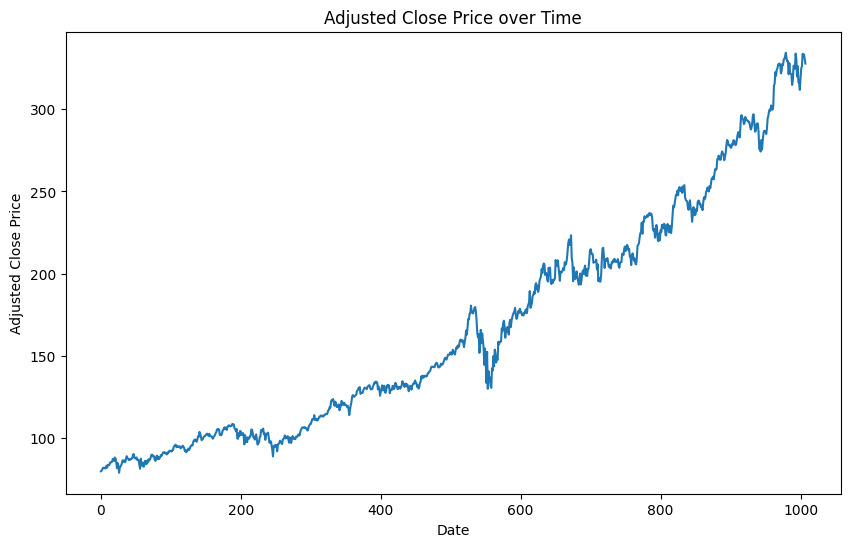

ADF Statistic: 1.2123610305928911
p-value: 0.9960701833206975


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Plot the 'Adj Close' to visually inspect the data
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.title('Adjusted Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Perform ADF test to check stationarity
result = adfuller(df['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value > 0.05, the series is non-stationary and needs differencing


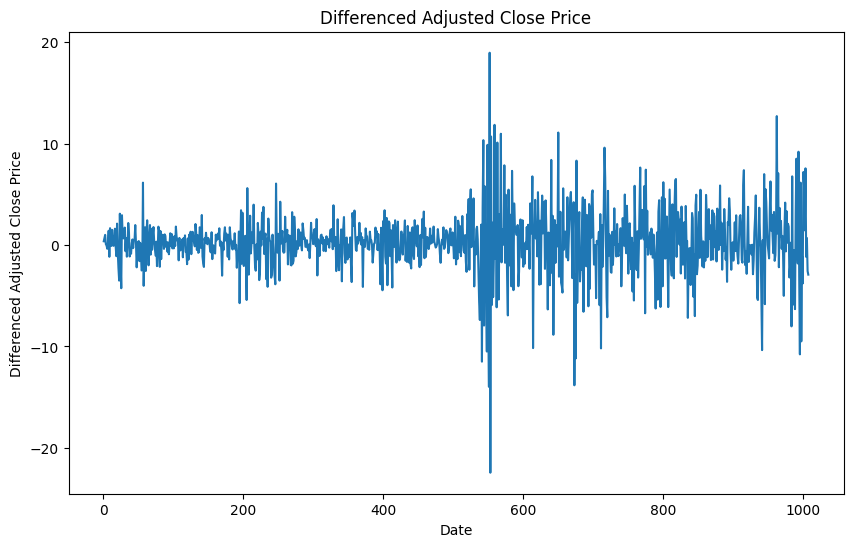

ADF Statistic (Differenced): -7.8704887092273035
p-value (Differenced): 5.000409033793895e-12


In [9]:
# Difference the series to make it stationary (if ADF test shows non-stationary)
df['Adj Close Diff'] = df['Adj Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close Diff'])
plt.title('Differenced Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Adjusted Close Price')
plt.show()

# Check ADF test again for stationarity
result_diff = adfuller(df['Adj Close Diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")


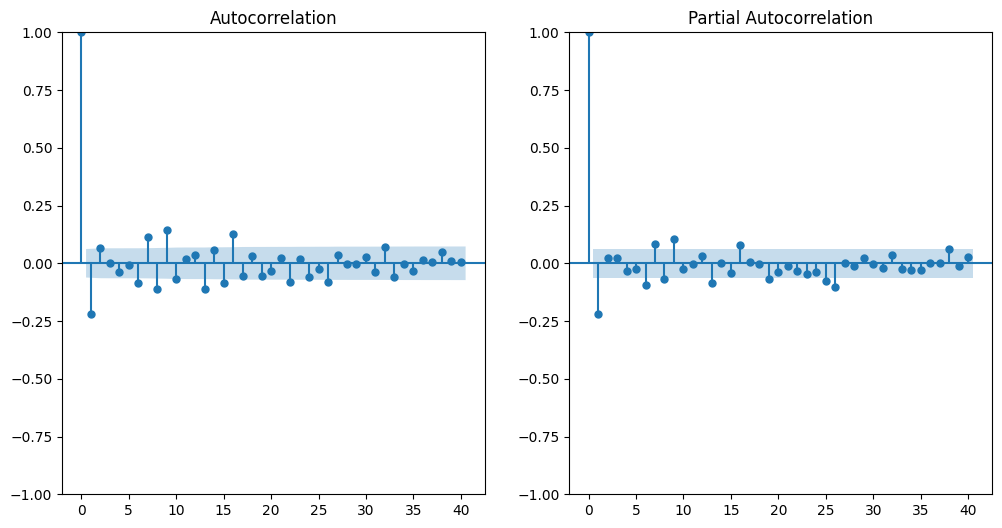

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series to determine p and q
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Adj Close Diff'].dropna(), lags=40, ax=plt.gca())

plt.subplot(122)
plot_pacf(df['Adj Close Diff'].dropna(), lags=40, ax=plt.gca())

plt.show()


In [11]:
from pmdarima import auto_arima

# Fit ARIMA model using auto_arima for optimal p, d, q
model = auto_arima(df['Adj Close'], 
                   seasonal=False, 
                   stepwise=True, 
                   trace=True, 
                   test='adf',  # ADF test for stationarity
                   information_criterion='aic')

# Print the model summary to check optimal parameters
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5100.132, Time=4.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5142.465, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5095.377, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5099.457, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5146.797, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5096.942, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5097.023, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5099.376, Time=1.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5103.202, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 8.052 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1008
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2544.689
Date:                Sat, 11 Jan 2025   AIC      

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Use the best parameters from auto_arima or ACF/PACF analysis (example: p=1, d=1, q=1)
arima_model = ARIMA(df['Adj Close'], order=(3, 1, 2))
arima_model_fit = arima_model.fit()

# Print model summary
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1008
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2532.912
Date:                Sat, 11 Jan 2025   AIC                           5077.825
Time:                        20:14:48   BIC                           5107.313
Sample:                             0   HQIC                          5089.029
                               - 1008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9775      0.039    -50.383      0.000      -2.054      -1.901
ar.L2         -1.2232      0.057    -21.610      0.000      -1.334      -1.112
ar.L3         -0.1426      0.025     -5.814      0.0

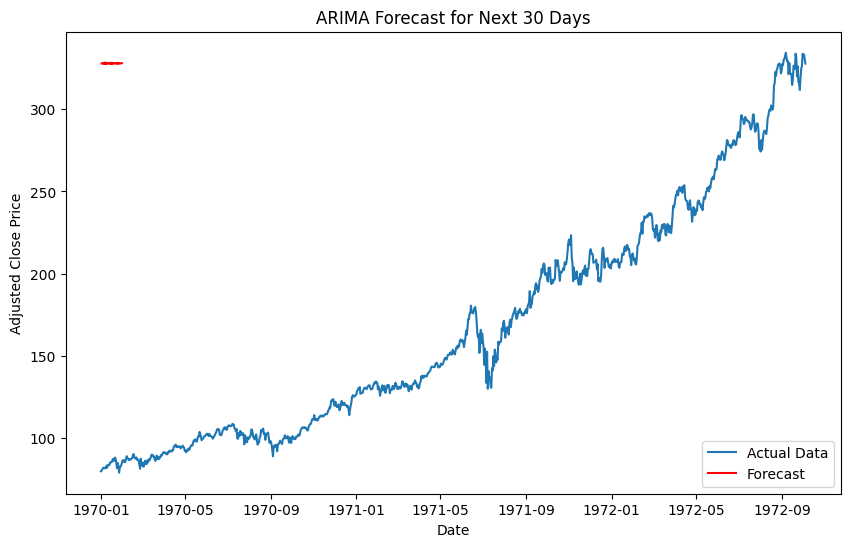

In [13]:
# Forecast future values (for example, next 30 days)
forecast_steps = 30
forecast = arima_model_fit.forecast(steps=forecast_steps)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(df.index, df['Adj Close'], label='Actual Data')

# Create date range for forecast
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title(f'ARIMA Forecast for Next {forecast_steps} Days')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming you have a test set (e.g., the last 30 days for testing)
test_data = df['Adj Close'].iloc[-forecast_steps:]

# Calculate forecast errors
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 5.414801558262824
Mean Squared Error (MSE): 45.2509157270055
Root Mean Squared Error (RMSE): 6.726880088644772


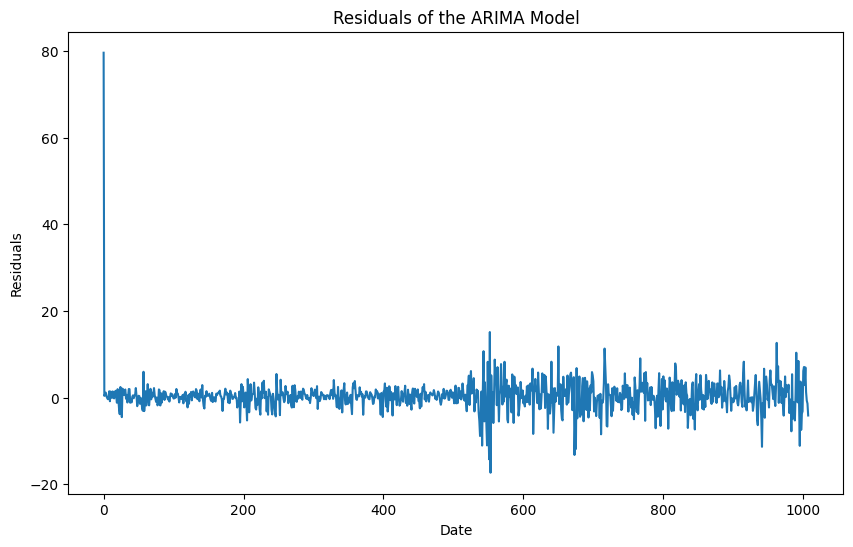

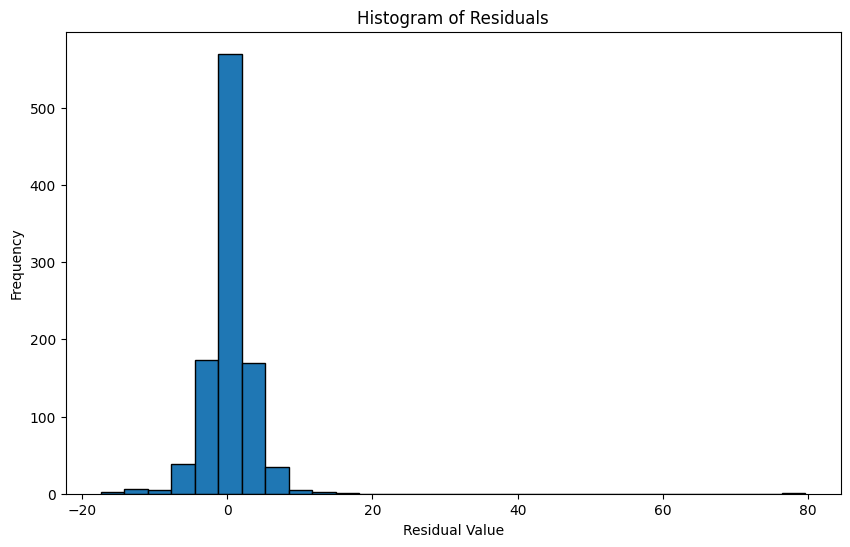

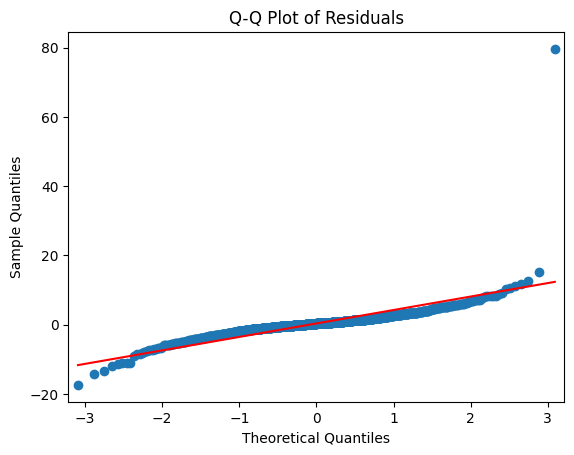

In [15]:
# Residuals of the model
residuals = arima_model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# Check if residuals are normally distributed using a Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


C:\Users\rishi\Python\Python3119\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rishi\Python\Python3119\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


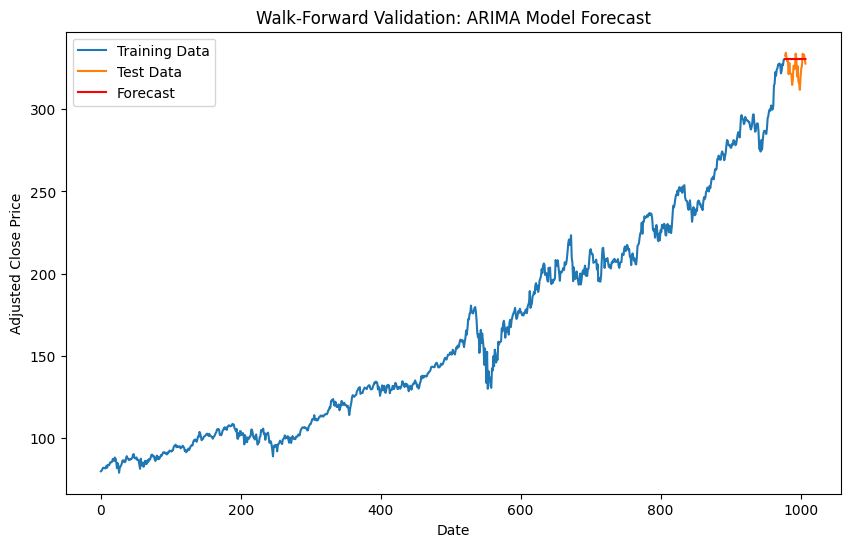

In [16]:
# Walk-forward validation (example: rolling window)
train = df['Adj Close'][:len(df)-forecast_steps]
test = df['Adj Close'][len(df)-forecast_steps:]

# Fit ARIMA model on the training data
walk_forward_model = ARIMA(train, order=(3, 1, 2))
walk_forward_model_fit = walk_forward_model.fit()

# Forecast for the test period
walk_forward_forecast = walk_forward_model_fit.forecast(steps=forecast_steps)

# Plot the forecast against actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, walk_forward_forecast, label='Forecast', color='red')
plt.legend()
plt.title('Walk-Forward Validation: ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


By doing ACF and PACF, we get the optimal parameters for ARIMA are (3,1,2). After that, the train data has been fit by the ARIMA model and used to forecast for the test dataset. The forecasted values are constant, which seems to suggest that the model hasn't really learnt the pattern very well. The residual graph seem to have most of the values centred around 0 and distribution looks like a sharp Gaussian which is ideal. Hence this suggests model seems to have picked some pattern, but still not completely.The errors also seem to suggest forecasted values are preety close to the actual, which is a good sign. 

## LSTM model

In [17]:
df = pd.read_csv("Preprocessed_MSFT.csv")
df = df[2:].reset_index(drop = True)
df

,Unnamed: 0,Price,Adj Close,Close,High,Low,Open,Volume
0,2,2018-01-04,80.71,87.11,87.66,86.57,86.59,21912000
1,3,2018-01-05,81.71,88.19,88.41,87.43,87.66,23407100
2,4,2018-01-08,81.79,88.28,88.58,87.60,88.20,22113000
3,5,2018-01-09,81.74,88.22,88.73,87.86,88.65,19484300
4,6,2018-01-10,81.37,87.82,88.19,87.41,87.86,18652200
...,...,...,...,...,...,...,...,...
1001,1003,2021-12-27,333.79,342.45,342.48,335.43,335.46,19947000
1002,1004,2021-12-28,332.62,341.25,343.81,340.32,343.15,15661500
1003,1005,2021-12-29,333.31,341.95,344.30,339.68,341.30,15042000
1004,1006,2021-12-30,330.74,339.32,343.13,338.82,341.91,15994500


In [18]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

In [19]:
df = df[["Price", "Close"]]
df["Price"] = df["Price"].apply(str_to_datetime)
df

C:\Users\rishi\AppData\Local\Temp\ipykernel_33112\200941683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].apply(str_to_datetime)


,Price,Close
0,2018-01-04,87.11
1,2018-01-05,88.19
2,2018-01-08,88.28
3,2018-01-09,88.22
4,2018-01-10,87.82
...,...,...
1001,2021-12-27,342.45
1002,2021-12-28,341.25
1003,2021-12-29,341.95
1004,2021-12-30,339.32


In [20]:
df.index = df.pop('Price')
df

,Close
Price,
2018-01-04,87.11
2018-01-05,88.19
2018-01-08,88.28
2018-01-09,88.22
2018-01-10,87.82
...,...
2021-12-27,342.45
2021-12-28,341.25
2021-12-29,341.95


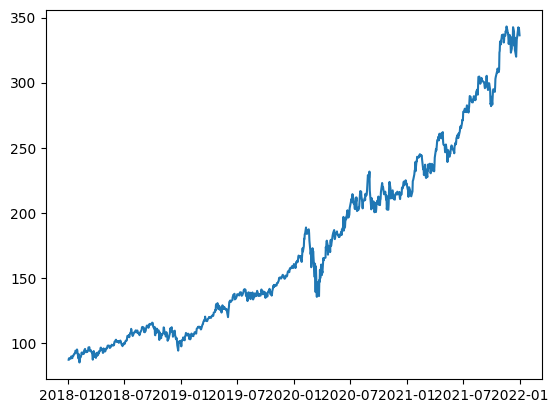

In [21]:
plt.plot(df.index, df["Close"])

In [22]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2018-03-25', 
                                '2021-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-03-25,93.13,92.48,89.79,87.18
1,2018-03-27,89.79,87.18,93.78,89.47
2,2018-03-28,87.18,93.78,89.47,89.39
3,2018-03-29,93.78,89.47,89.39,91.27
4,2018-04-02,89.47,89.39,91.27,88.52
...,...,...,...,...,...
749,2021-03-17,235.75,234.81,237.71,237.04
750,2021-03-18,234.81,237.71,237.04,230.72
751,2021-03-19,237.71,237.04,230.72,230.35
752,2021-03-22,237.04,230.72,230.35,235.99


In [23]:
def windowed_df_to_date_X_Y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_Y(windowed_df)

dates.shape, X.shape, y.shape

((754,), (754, 3, 1), (754,))

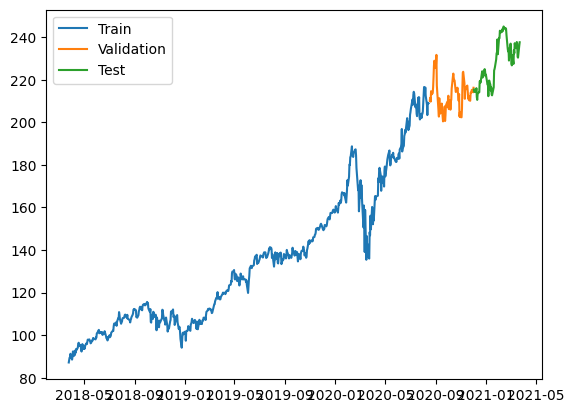

In [24]:
total_samples = len(dates)  # Ensure all splits align
q_80 = int(total_samples * 0.8)
q_90 = int(total_samples * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
print(X_train.shape, dates_train.shape, y_train.shape)


(603, 3, 1) (603,) (603,)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Hyperparameters
learning_rates = [1e-3, 5e-4, 1e-4]
batch_size = 32
epochs = 100

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    
    model = Sequential([
        layers.Input((3, 1)),
        layers.LSTM(128, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=lr),
                  metrics=['mean_absolute_error'])
    
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size)


Training with learning rate: 0.001
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 19506.2988 - mean_absolute_error: 135.6638 - val_loss: 43413.8984 - val_mean_absolute_error: 208.2430
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17108.0645 - mean_absolute_error: 126.4561 - val_loss: 37414.0391 - val_mean_absolute_error: 193.3008
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 12538.7119 - mean_absolute_error: 107.6500 - val_loss: 28757.8066 - val_mean_absolute_error: 169.4373
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8316.4805 - mean_absolute_error: 84.3387 - val_loss: 18474.3770 - val_mean_absolute_error: 135.7411
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3518.5156 - mean_absolute_error: 49.0837 - val_loss: 9688.1484 - val_mean_absolute_error: 98.1805
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1243.9246 - mean_absolute_error: 26.7923 - val_loss: 5841.8057 - val_mean_absolute_error: 76.1122
Epo

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


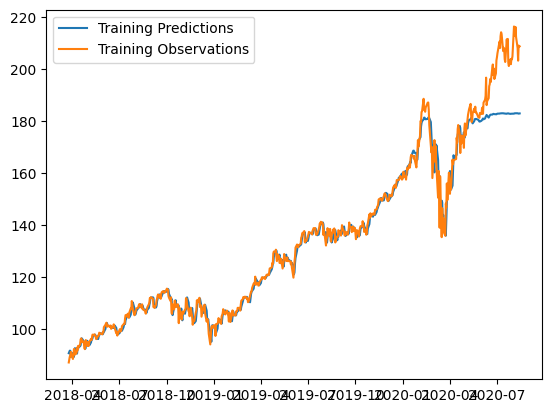

In [27]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


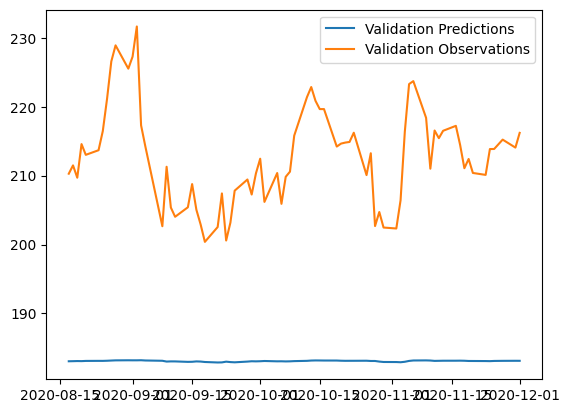

In [28]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


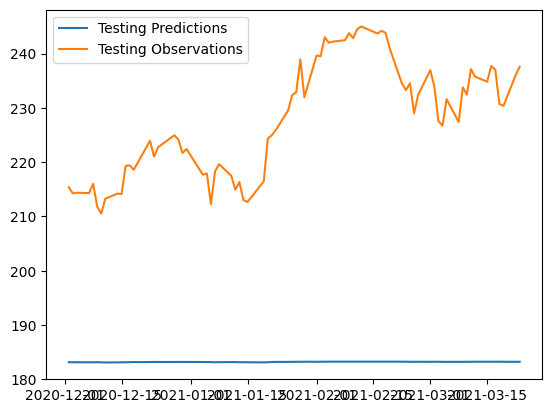

In [29]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

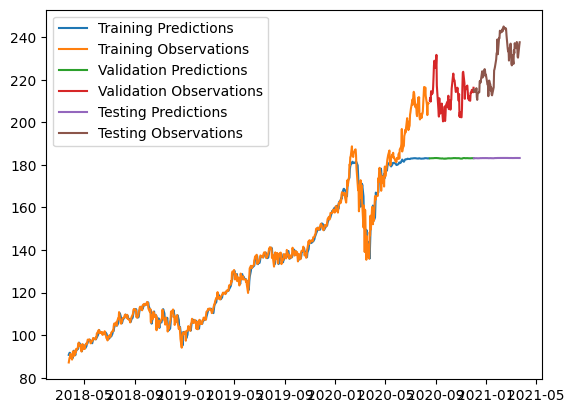

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

I have used a little complex architecture consisting of 2 LSTMS, followed by 2 Dense layers since predicting stock prices is a complex task and may require complex structures. Neurons have been kept 128 for the first layer and 64 for the second to compress features effectively. The activation function for the hidden layers was set as ReLU. Optimizer I chose I Adam since it adjusts the learning rate dynamically for each parameter, making it robust for non-stationary objectives and noisy gradients, I have tried learning rate of 1e-3, 5e-4 and 1e-4. Batch size of 32 and 64 has been used. Number of epochs has been made 500 for proper convergence of loss and optimum results.

## Comparison between ARIMA and LSTM

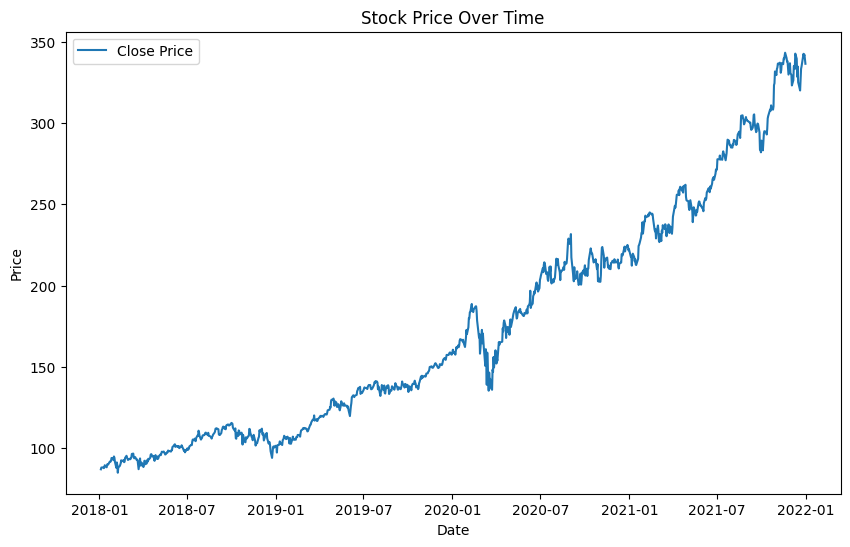

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4871.845, Time=4.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4806.177, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4875.249, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4866.467, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4805.288, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4873.341, Time=1.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4873.314, Time=1.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4871.521, Time=6.40 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4872.075, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 16.628 seconds
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - loss: 0.0377 - val_loss: 0.0044
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.8740e-04 - val_loss: 3.9850e-04
Epoch 4/

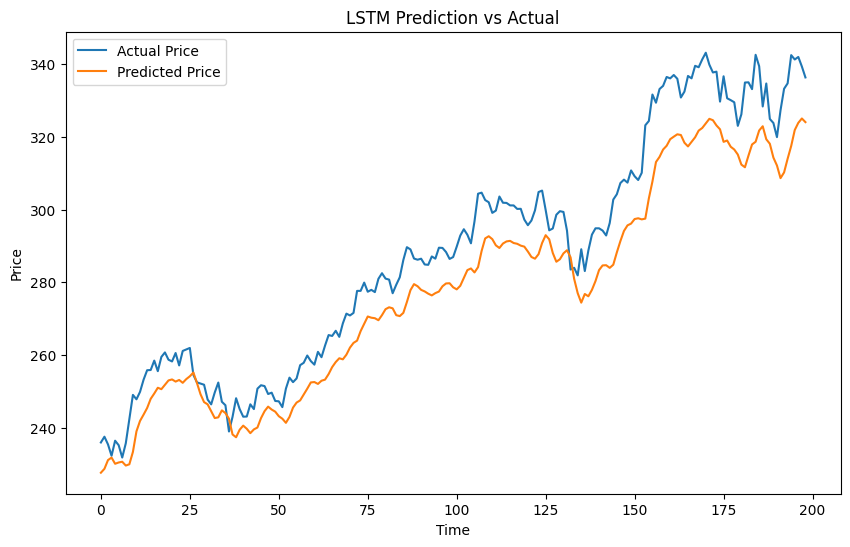

ARIMA MSE: 3549.2706
ARIMA MAE: 50.1718


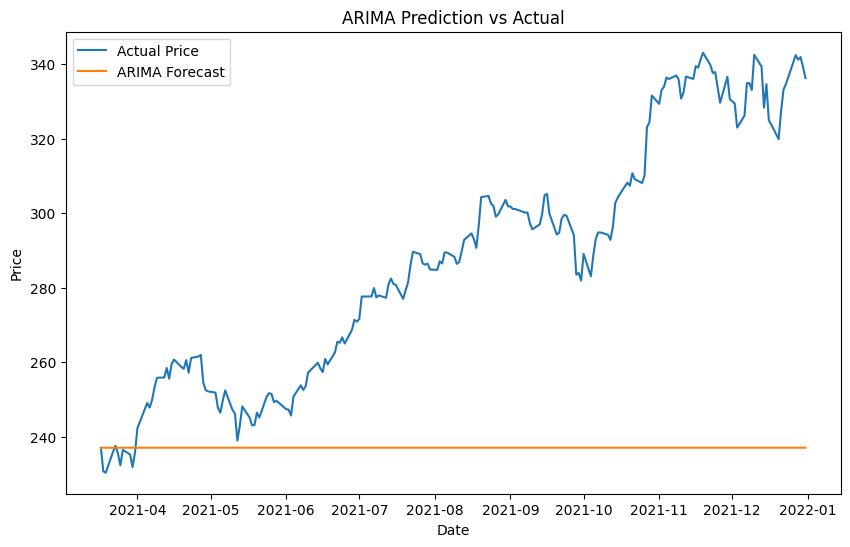

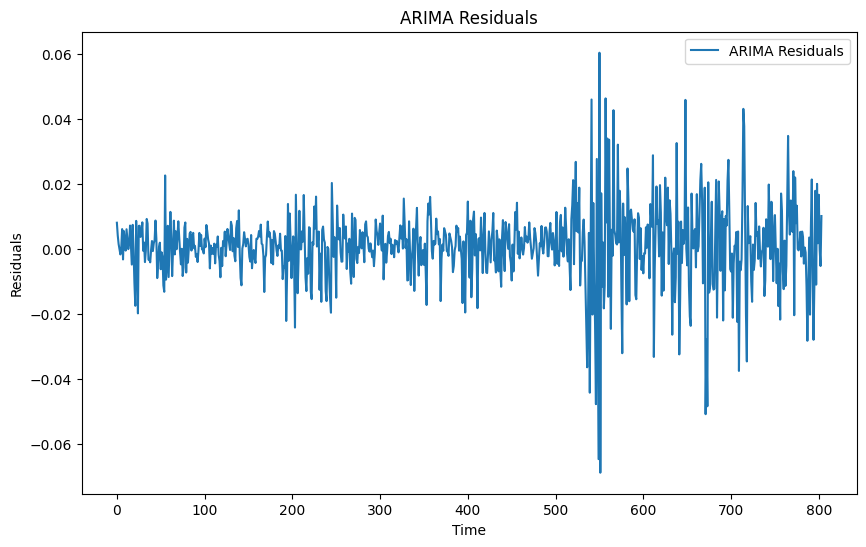

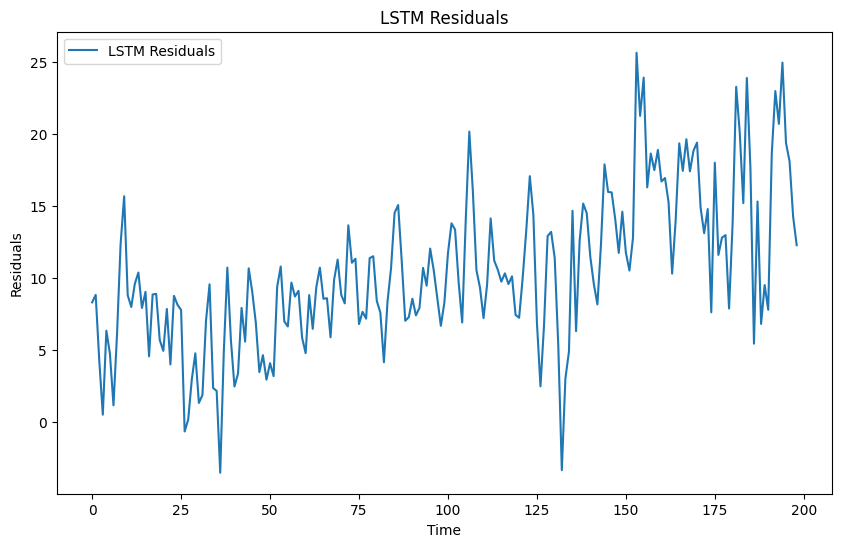

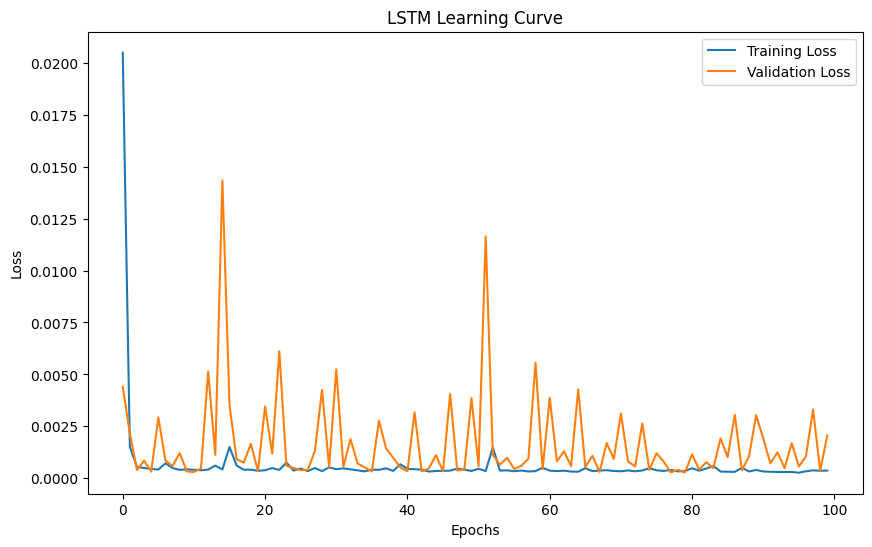

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

# Split data
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Sequence creation
def create_sequences(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

X_train, Y_train = create_sequences(train_data, 3)
X_test, Y_test = create_sequences(test_data, 3)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ARIMA with auto_arima on raw scaled data
raw_train_data = train_data.flatten()
auto_model = auto_arima(raw_train_data, seasonal=False, trace=True, test = 'adf', error_action='ignore', suppress_warnings=True, information_criterion = 'aic')
arima_model = ARIMA(raw_train_data, order=auto_model.order)
arima_result = arima_model.fit()
forecast_arima = arima_result.forecast(steps=len(test_data))

# Inverse transform ARIMA predictions
forecast_arima = scaler.inverse_transform(forecast_arima.reshape(-1, 1))
actual_arima = scaler.inverse_transform(test_data)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(units=100)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history = lstm_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# LSTM Prediction
predicted_lstm = lstm_model.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm.reshape(-1, 1))
actual_lstm = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Evaluation
mse_lstm = mean_squared_error(actual_lstm, predicted_lstm)
mae_lstm = mean_absolute_error(actual_lstm, predicted_lstm)
print(f'LSTM MSE: {mse_lstm:.4f}')
print(f'LSTM MAE: {mae_lstm:.4f}')

# Plot LSTM results
plt.figure(figsize=(10, 6))
plt.plot(actual_lstm, label='Actual Price')
plt.plot(predicted_lstm, label='Predicted Price')
plt.title('LSTM Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# ARIMA Evaluation
mse_arima = mean_squared_error(actual_arima, forecast_arima)
mae_arima = mean_absolute_error(actual_arima, forecast_arima)
print(f'ARIMA MSE: {mse_arima:.4f}')
print(f'ARIMA MAE: {mae_arima:.4f}')

# ARIMA plot with corrected index
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(actual_arima):], actual_arima, label='Actual Price')
plt.plot(df.index[-len(forecast_arima):], forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Residuals for ARIMA
residuals_arima = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals_arima, label='ARIMA Residuals')
plt.title('ARIMA Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Residuals for LSTM
residuals_lstm = actual_lstm.flatten() - predicted_lstm.flatten()
plt.figure(figsize=(10, 6))
plt.plot(residuals_lstm, label='LSTM Residuals')
plt.title('LSTM Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Learning Curve for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Strengths and Weaknesses of LSTM and ARIMA

#### 1. **Handling Seasonality and Trends**
- LSTM: 
  - Strength: Effectively captures complex seasonality and trends with long-term dependencies.
  - Weakness: Requires large data and may overfit on simple seasonality.
  
- ARIMA: 
  - Strength: Good for simple seasonality and trends, especially with SARIMA for seasonal data.
  - Weakness: Struggles with complex or irregular trends and seasonality.

#### 2. **Ability to Capture Non-linear Patterns**
- LSTM: 
  - Strength: Can model non-linear relationships well due to its flexibility.
  - Weakness: May overfit or require extensive tuning on complex data.

- ARIMA: 
  - Strength: Good for linear relationships.
  - Weakness: Cannot capture non-linear patterns effectively.

#### 3. **Computational Complexity**
- LSTM: 
  - Strength: Efficient in prediction once trained.
  - Weakness: High computational cost during training and requires large datasets.

- ARIMA: 
  - Strength: Computationally lightweight and quick for small datasets.
  - Weakness: Can be inefficient with large or complex datasets.